## 连续小波变换（Continuous Wavelet Transform，CWT）

连续小波变换（Continuous Wavelet Transform，CWT）是一种用于信号分析的数学工具，它可以提供信号在时间和频率上的局部详细信息。与傅里叶变换相比，小波变换的一个主要优势是它能够同时提供时间和频率的信息，这使得它在处理具有非平稳特性的信号时特别有用。

### 基本原理：
连续小波变换使用一组通过缩放和平移得到的小波函数来分析信号。这些小波函数被称为“母小波”。通过调整小波函数的缩放（控制频率宽度）和平移（控制时间位置），可以精确地分析信号的局部特征。

### 数学表达：
如果 $x(t)$ 是一个连续时间信号，其连续小波变换 $X(a, b)$ 定义为：
$$
X(a, b) = \int_{-\infty}^{\infty} x(t) \frac{1}{\sqrt{a}} \psi\left(\frac{t-b}{a}\right) dt
$$
其中，$\psi(t)$ 是母小波函数，$a$ 是缩放参数（影响频率），$b$ 是平移参数（影响时间位置）。

### 应用：
1. **信号分析**：在工程和科学研究中，用于分析各种时间序列数据，如音频信号、地震数据等。
2. **图像处理**：用于图像的特征提取、边缘检测等。
3. **数据压缩**：小波变换可以有效地压缩数据，尤其是在图像和声音压缩领域。
4. **去噪**：通过小波变换分解信号，可以有效地去除噪声成分。

连续小波变换的一个缺点是它的计算量通常比离散小波变换（DWT）大，因此在实际应用中，人们往往更倾向于使用离散小波变换。


## Morlet小波

Morlet小波是一种常用的连续小波变换的小波函数，它是由法国地球物理学家Jean Morlet在20世纪80年代初期提出的。Morlet小波因其良好的时间-频率局部化特性而广泛应用于信号处理和时间序列分析中。

### 定义
Morlet小波的基本形式可以表示为一个复指数函数（一个正弦波）乘以一个高斯窗。数学表达式如下：

$$
\psi(t) = \pi^{-1/4} e^{i \omega_0 t} e^{-t^2/2}
$$

其中：
- $\pi^{-1/4}$ 是归一化因子，确保小波具有单位能量。
- $\omega_0$ 是小波的中心频率。
- $t$ 是时间变量。

### 特点
1. **时间-频率局部化**：Morlet小波由于其高斯包络，具有良好的时间和频率局部化特性。这意味着它能够在时间和频率域中同时提供精确的信息。
2. **调整性**：通过改变中心频率$\omega_0$，可以调整小波对不同频率成分的敏感性。通常，$\omega_0$被设定为大于5以避免高斯窗的负频率分量。
3. **复数形式**：Morlet小波是一个复数小波，这意味着它可以提供信号的相位信息，这在许多应用中是非常有用的。

### 傅里叶因子

Morlet小波的傅里叶因子（Fourier factor）是一个重要的参数，它用于将小波尺度转换为与之对应的傅里叶周期。这一转换对于将小波变换的结果与传统的傅里叶分析结果联系起来非常有用，尤其是在频率分析中。

#### 定义和计算
对于Morlet小波，傅里叶因子主要取决于小波的中心频率 $\omega_0$。傅里叶因子的计算公式为：

$$
\text{Fourier factor} = \frac{4\pi}{\omega_0 + \sqrt{2 + \omega_0^2}}
$$

这个公式提供了从小波尺度 $s$ 到对应的傅里叶周期 $T$ 的转换，其中 $T$ 可以通过以下关系计算：

$$
T = s \times \text{Fourier factor}
$$

下面是morlet小波实例

64.0


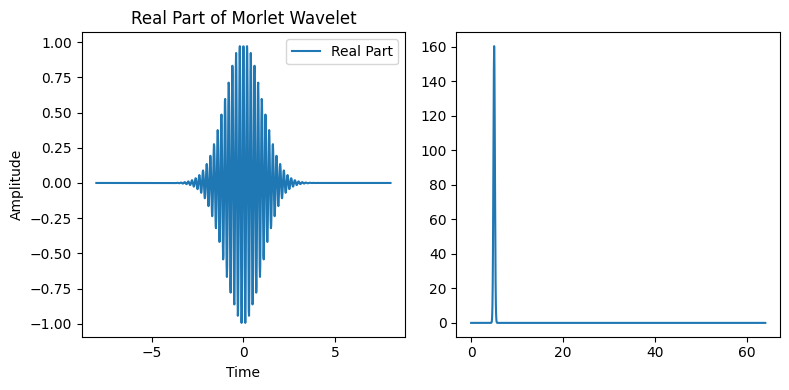

In [25]:

import numpy as np
import matplotlib.pyplot as plt

def morlet_wavelet(t, w=5.0, s=5.0):
    """
    改进的Morlet小波函数。
    参数:
    - t : 时间数组
    - w : 频率参数
    - s : 尺度参数，影响小波的宽度
    """
    return np.exp(-0.5 * (t / s)**2) * np.exp(1j * 2 * np.pi * w * t)

# 创建时间向量
t = np.linspace(-8, 8, 1024)
print(1024 / 16)
t, s = t/1, 1

# 计算Morlet小波
wavelet = morlet_wavelet(t,s=s)

# 绘制Morlet小波的实部和虚部
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(t, np.real(wavelet), label='Real Part')
plt.title('Real Part of Morlet Wavelet')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(122)
fs = 1024 / 16
freq = fs / 1024 * np.linspace(0, 1024, 1024)
plt.plot(freq, np.abs(np.fft.fft(wavelet, 1024)))

plt.tight_layout()
plt.show()

### 基于Morlet的连续小波变换

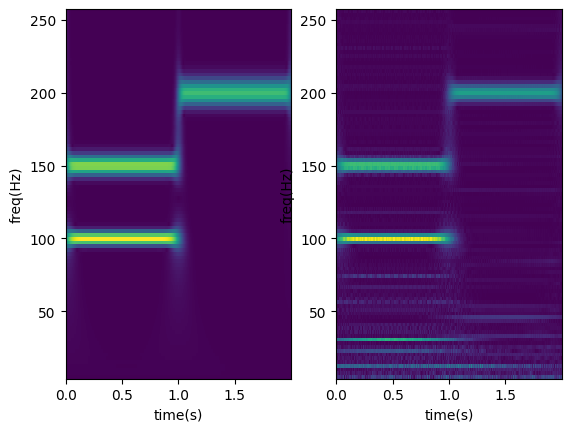

In [2]:

import numpy as np
import pywt
import matplotlib.pyplot as plt
from math import floor, ceil

def morlet_wavelet(t, s=1.0, w=5.0):
    """
    改进的Morlet小波函数。
    参数:
    - t : 时间数组
    - w : 频率参数
    - s : 尺度参数，影响小波的宽度
    """
    return (s**(-0.25)) * (np.pi**(-0.25)) * np.exp(-0.5 * t **2) * np.exp(1j * 2 * np.pi * w * t)


def next_fast_len(n):
    """Round up size to the nearest power of two.

    Given a number of samples `n`, returns the next power of two
    following this number to take advantage of FFT speedup.
    This fallback is less efficient than `scipy.fftpack.next_fast_len`
    """
    return 2**ceil(np.log2(n))

def continuous_wavelet_transform(signal, scales, wavelet_function, dt=1.0, method='conv'):
    n = len(signal)
    coefficients = np.empty((np.size(scales),) + signal.shape, dtype=complex)

    signal = signal.astype(complex)
    
    # 初始化morlet
    x = np.linspace(-8, 8, 1024) # this param(-8,8) is same as pywt 
    step = x[1] - x[0]
    int_psi_scale = wavelet_function(x)
    int_psi = np.conj(int_psi_scale)
    int_psi = np.asarray(int_psi)
    
    if method == 'fft':
        size_scale0 = -1
        fft_data = None
    
    # plt.figure()
    # plt.ion()
    for i, scale in enumerate(scales):
        if 0: # 该方法是Pywavelet的实现方式
            j = np.arange(scale * (x[-1] - x[0]) + 1) / (scale * step)
            j = j.astype(int)  # floor
            if j[-1] >= int_psi.size:
                j = np.extract(j < int_psi.size, j)
            wavelet_data = int_psi[j][::-1]
        
        scaled_t =  (np.arange(scale * (x[-1] - x[0]) + 1) / scale - (x[-1] - x[0])*0.5)
        wavelet_data = wavelet_function(scaled_t, s=scale)
        
        # plt.clf()
        # plt.plot(wavelet_data)
        # plt.show()
        # plt.pause(0.05)
                
        if method == 'conv':            
            conv = np.convolve(signal, wavelet_data)
        else:
            # The padding is selected for:
            # - optimal FFT complexity
            # - to be larger than the two signals length to avoid circular
            #   convolution
            size_scale = next_fast_len(
                signal.shape[-1] + wavelet_data.size - 1
            )
            if size_scale != size_scale0:
                # Must recompute fft_data when the padding size changes.
                fft_data = np.fft.fft(signal, size_scale, axis=-1)
            size_scale0 = size_scale
            fft_wav = np.fft.fft(wavelet_data, size_scale, axis=-1)
            conv = np.fft.ifft(fft_wav * fft_data, axis=-1)
            conv = conv[..., :signal.shape[-1] + wavelet_data.size - 1]

        coef = - np.sqrt(scale) * np.diff(conv, axis=-1)
        # transform axis is always -1 due to the data reshape above
        d = (coef.shape[-1] - signal.shape[-1]) / 2.
        coef = coef[..., floor(d):-ceil(d)]
        coefficients[i, :] = coef
            
    return coefficients

# 创建一个测试信号
Fs = 512
t = np.linspace(0, 1, Fs, endpoint=False)
# signal = np.sin(2 * np.pi * 100 * t)  + np.sin(2 * np.pi * 50 * t)                                                # TEST SIGNAL 1
signal = np.hstack([np.sin(2 * np.pi * 100 * t) + np.sin(2 * np.pi * 150 * t), np.sin(2 * np.pi * 200 * t) ])      # TEST SIGNAL 2

wavename = 'cmor5-5' # 5-5它们分别代表小波函数的参数，这些参数影响小波的频率和时间特性
# 定义缩放系数
totalscal = 100
# 中心频率
fc = pywt.central_frequency(wavename)
# 计算对应频率的小波尺度
cparam = 2 * fc * totalscal
scales = cparam / np.arange(totalscal, 1, -1)

# 计算CWT
coefficients1 = continuous_wavelet_transform(signal, scales, morlet_wavelet, method='fft')

# 使用pywavelet库进行小波变换
coefficients2, frequencies = pywt.cwt(signal, scales, wavename, sampling_period=1/Fs, method='fft')

t = np.linspace(0, 2, Fs * 2, endpoint=False)
# 绘制结果
plt.figure()
plt.subplot(121)
plt.pcolormesh(t, frequencies,  abs(coefficients1))
plt.ylabel(u"freq(Hz)")
plt.xlabel(u"time(s)")
plt.subplots_adjust(hspace=0.4)
plt.subplot(122)
plt.pcolormesh(t, frequencies, abs(coefficients2))
plt.ylabel(u"freq(Hz)")
plt.xlabel(u"time(s)")
plt.subplots_adjust(hspace=0.4)
plt.show()